## **Ted Talk Views Prediction**

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together.

TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website.
As we have a continous variable to predict, we use regression models to predict the views of the TED talks.


##**<u>Steps to follow:</u>**
##**1)Data loading**
##**2)Data Cleaning**
##**3)EDA**
##**4)Feature engineering** 
##**5)Model buliding**
##**6)Evaluation of models**



In [ ]:
  # Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading the data**

In [ ]:
#Importing the dataset

#tedtalk_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone 2/data_ted_talks.csv')

tedtalk_df = pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

In [ ]:
tedtalk_df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [ ]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
tedtalk_df.shape

(4005, 19)

We can observe that we have 4005 rows of data a=with 19 variables. Before starting with the EDA, we need to clean the data.

##**Data Cleaning**

In [ ]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_values_table(tedtalk_df)

 selected dataframe has 19 columns and 4005 




,Missing Values,% of Total Values,Data Type
comments,655,16.4,float64
occupations,522,13.0,object
about_speakers,503,12.6,object
all_speakers,4,0.1,object
recorded_date,1,0.0,object
talk_id,0,0.0,int64
description,0,0.0,object
url,0,0.0,object
related_talks,0,0.0,object
topics,0,0.0,object


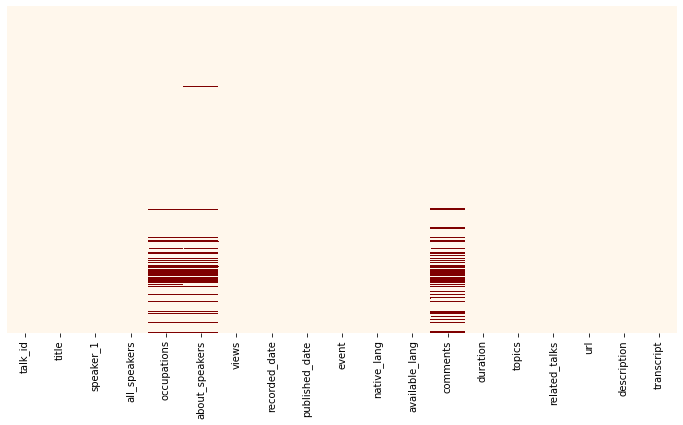

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(tedtalk_df.isnull(),cbar=False,yticklabels=False,cmap='OrRd');

We can see that we have missing values in several columns which needs to be treated after EDA.

Here many columns have the data in the form of a string and dictionaries. To access the data and to build model, we should have cleaned data which can be easily accessed. So we are converting all columns to its proper datatype.

In [ ]:
tedtalk_df['occupations'].fillna(str({0:['other']}),inplace=True)
#filling NA with other

tedtalk_df['occupations'] = tedtalk_df.apply(lambda row: eval(row['occupations']), axis=1)
#to convert from str to dict

tedtalk_df['occupations'] = tedtalk_df['occupations'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['about_speakers'].fillna(str({0:'Not specified'}),inplace=True)
#filling the NA's with 'Not specified'

tedtalk_df['about_speakers'] = tedtalk_df.apply(lambda row: eval(row['about_speakers']), axis=1)
#to convert from str to dict

tedtalk_df['about_speakers'] = tedtalk_df['about_speakers'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['recorded_date'].fillna(tedtalk_df['recorded_date'].mode()[0],inplace=True)
#since dates are kind of discrete vaariables, we replace NA with mode.

tedtalk_df['available_lang'] = tedtalk_df['available_lang'].apply(lambda row: eval(row))
tedtalk_df['topics'] = tedtalk_df['topics'].apply(lambda row: eval(row))
tedtalk_df['related_talks'] = tedtalk_df['related_talks'].apply(lambda row: eval(row))
#converting all the remaining columns which were in strings to their respective datatypes.


Here, some of the missing values are treated which missing value % was very less. Its done beacuse it will give better visualizations in our EDA.

In [ ]:
tedtalk_df.drop(['talk_id','all_speakers','url'],axis=1,inplace=True)

These columns are deleted as its not carrying much significance.

In [ ]:
tedtalk_df.info()
#Apart from the numeric column we are going to deal with all other missing values as its usefull for the EDA.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   occupations     4005 non-null   object 
 3   about_speakers  4005 non-null   object 
 4   views           4005 non-null   int64  
 5   recorded_date   4005 non-null   object 
 6   published_date  4005 non-null   object 
 7   event           4005 non-null   object 
 8   native_lang     4005 non-null   object 
 9   available_lang  4005 non-null   object 
 10  comments        3350 non-null   float64
 11  duration        4005 non-null   int64  
 12  topics          4005 non-null   object 
 13  related_talks   4005 non-null   object 
 14  description     4005 non-null   object 
 15  transcript      4005 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 500.8+ KB


Date, month and year columns are converted to its proper Datetime datatype.

In [ ]:
import datetime
tedtalk_df['published_date']=pd.to_datetime(tedtalk_df['published_date'], format='%Y-%m-%d')
tedtalk_df['recorded_date']=pd.to_datetime(tedtalk_df['recorded_date'], format='%Y-%m-%d')
#converting the published and recorded date as datetime datatype

In [ ]:
tedtalk_df['release_day'] = tedtalk_df['published_date'].apply(lambda x: x.weekday())
tedtalk_df['release_month']=tedtalk_df['published_date'].apply(lambda x: x.month)
tedtalk_df['release_year'] = tedtalk_df['published_date'].apply(lambda x: x.year)
#finding out the respected day,month and year

In [ ]:
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_df['release_day']=tedtalk_df['release_day'].map(week_day)
#tedtalk_day was interms of numbers which were holding the record of monday till sunday...so converting that to exact days here

month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_df['release_month']=tedtalk_df['release_month'].map(month_dict)
#again converting the month which was in numbers to exact month names

In [ ]:
tedtalk_df.head(2)

,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,release_day,release_month,release_year
0,Averting the climate crisis,Al Gore,[climate advocate],Nobel Laureate Al Gore focused the world’s att...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006
1,The best stats you've ever seen,Hans Rosling,[global health expert; data visionary],"In Hans Rosling’s hands, data sings. Global tr...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,1190,"[Africa, Asia, Google, demo, economics, global...","{2056: 'Own your body's data', 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,June,2006


In [ ]:
ted_talk_df = tedtalk_df.copy()

In [ ]:
tedtalk_df.head(2)

,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript,release_day,release_month,release_year
0,Averting the climate crisis,Al Gore,[climate advocate],Nobel Laureate Al Gore focused the world’s att...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Tuesday,June,2006
1,The best stats you've ever seen,Hans Rosling,[global health expert; data visionary],"In Hans Rosling’s hands, data sings. Global tr...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,1190,"[Africa, Asia, Google, demo, economics, global...","{2056: 'Own your body's data', 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Tuesday,June,2006


Now that a basic level cleaning of dataset is done we will start with the process of EDA